## Transformers and Attention Mechanism 

**Instructor : Jason Lin and Brian Cruz**

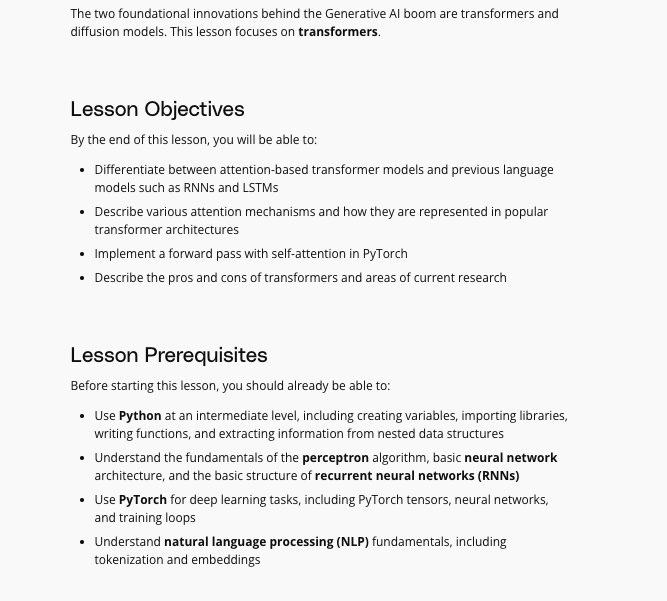

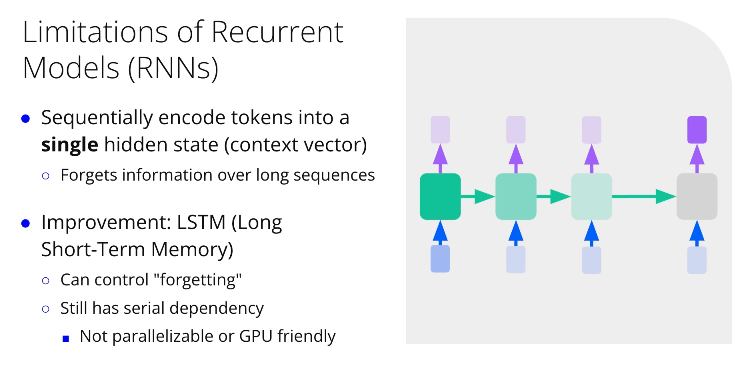

<p align="center">
  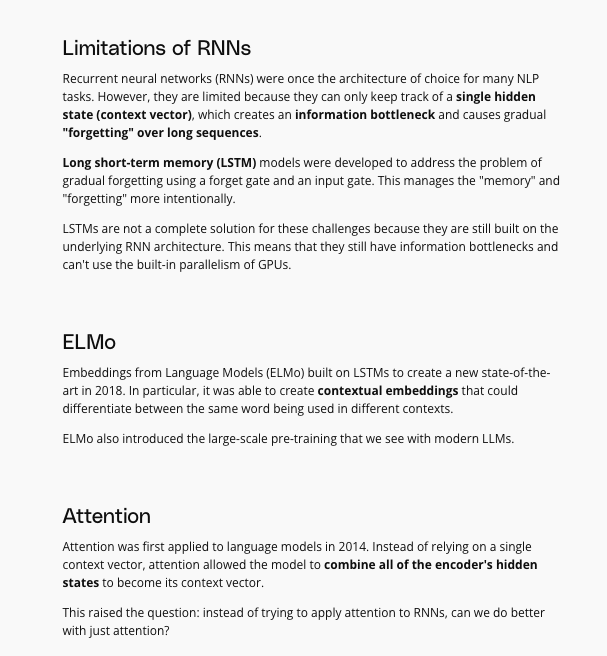
  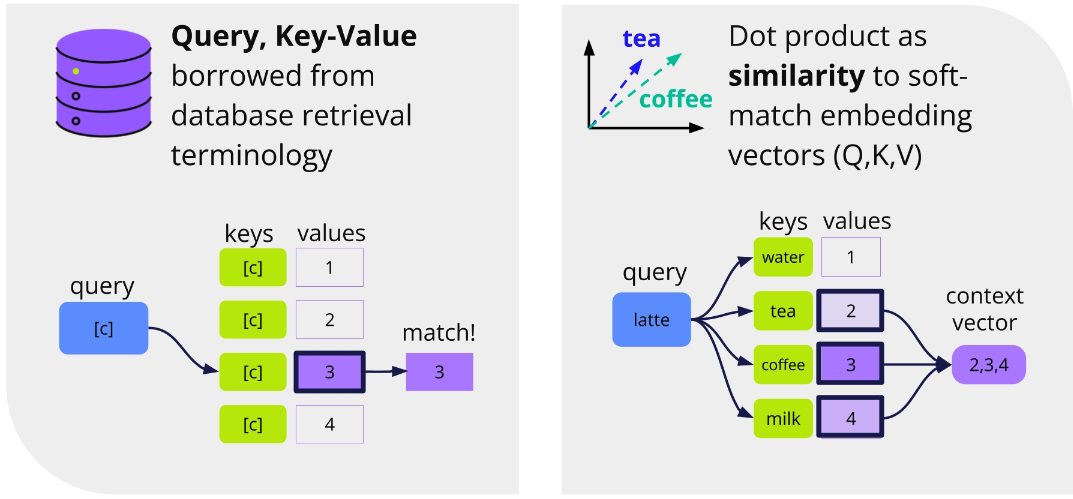
  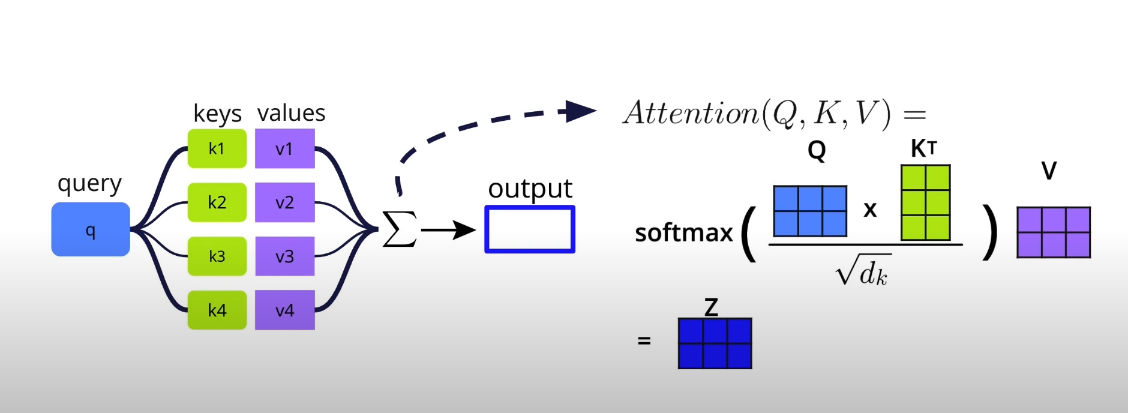
</p>

<p align="center">
  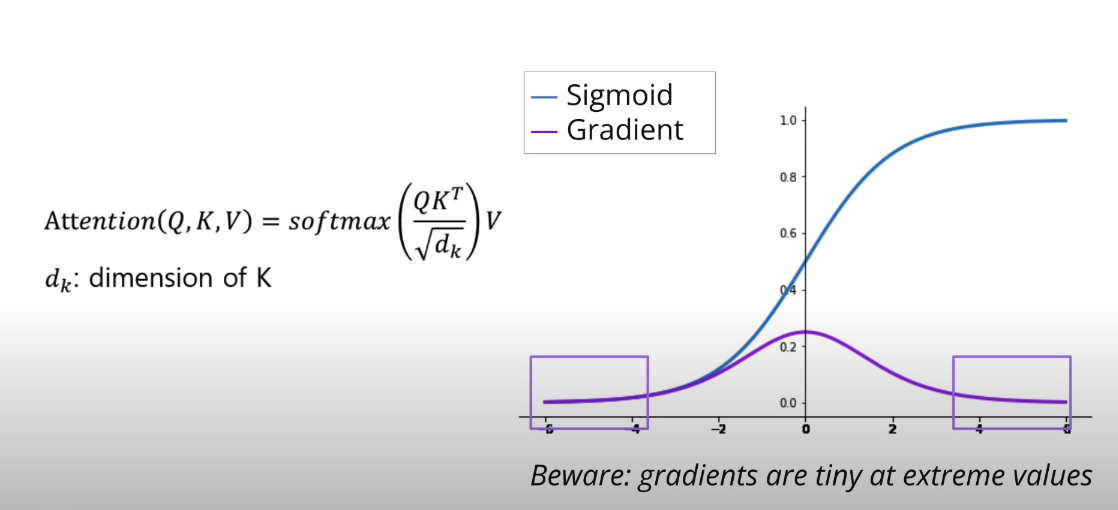
  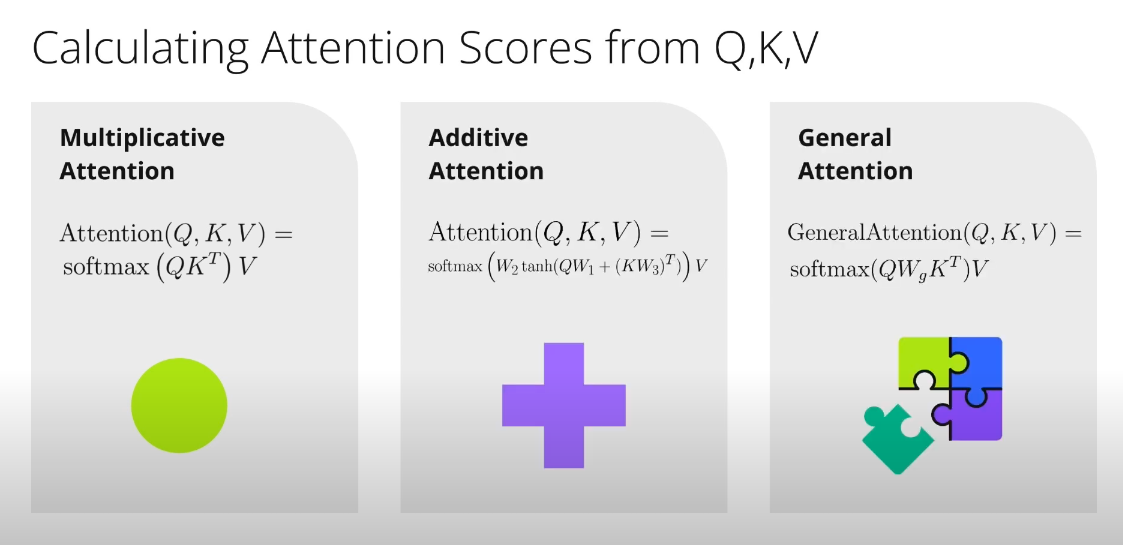
  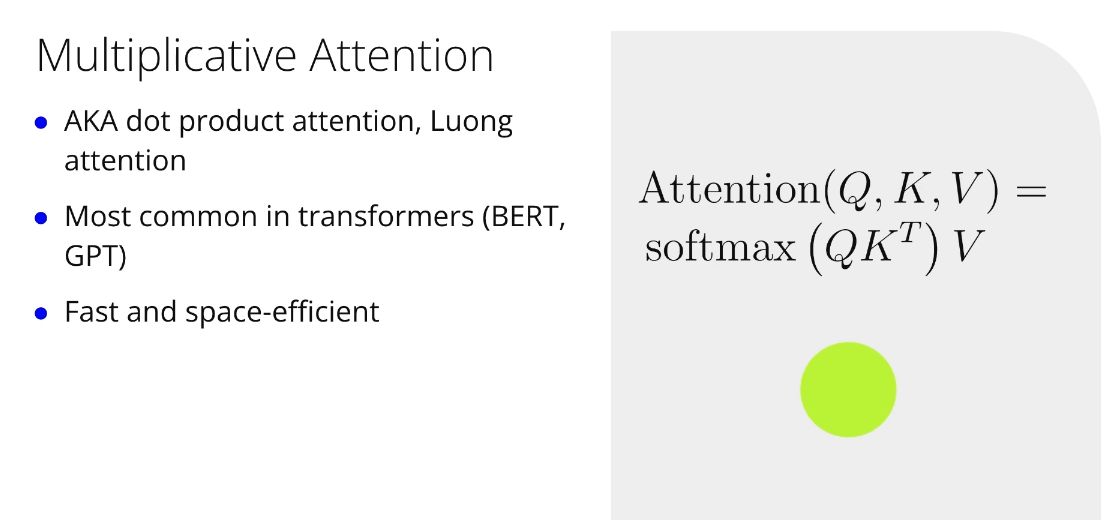
</p>

<p align="center">
  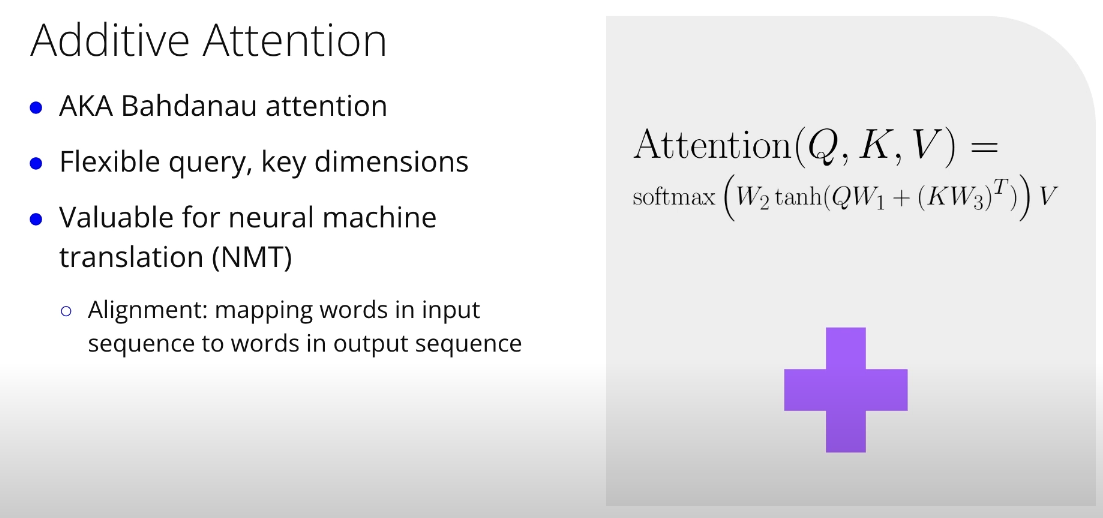
  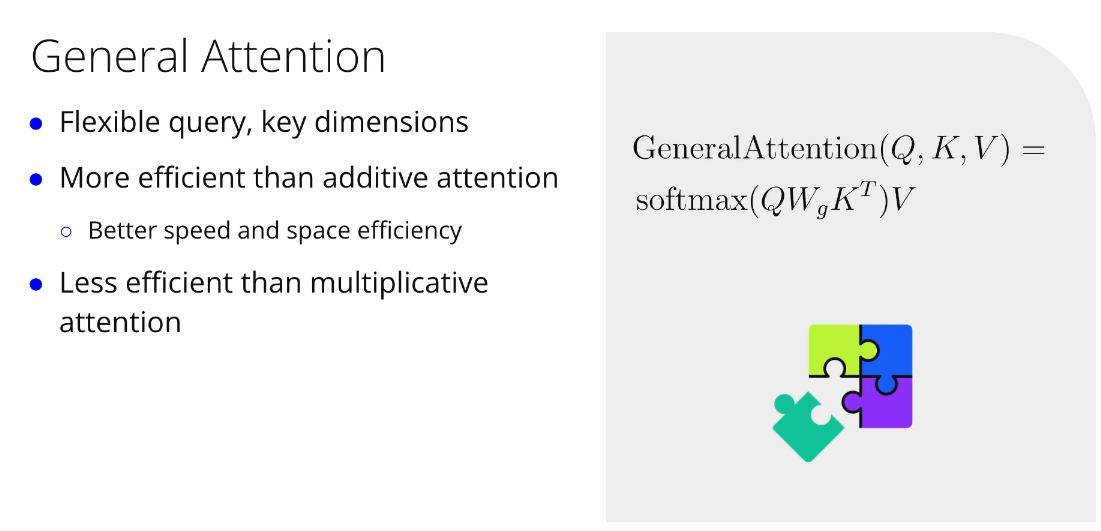
  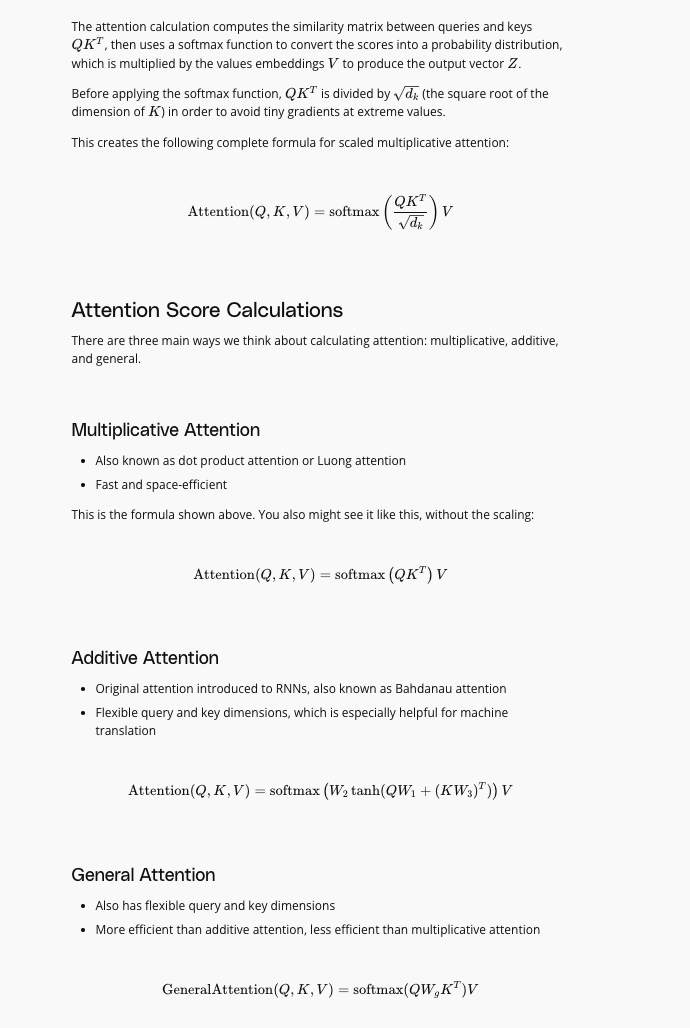
  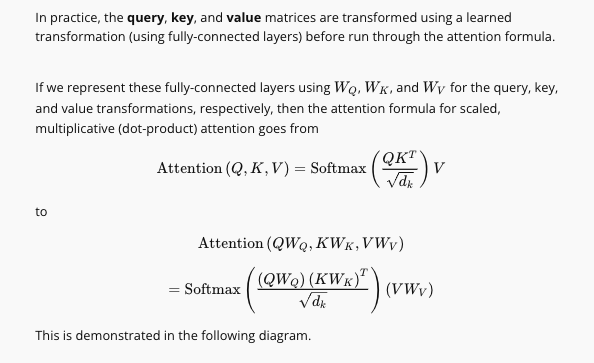
</p>



For self-attention, the Q, K, and V matrices are actually identical. For self-attention, they are obtained from token embeddings, which are the output of the previous neural network layer.

<p align="center">
  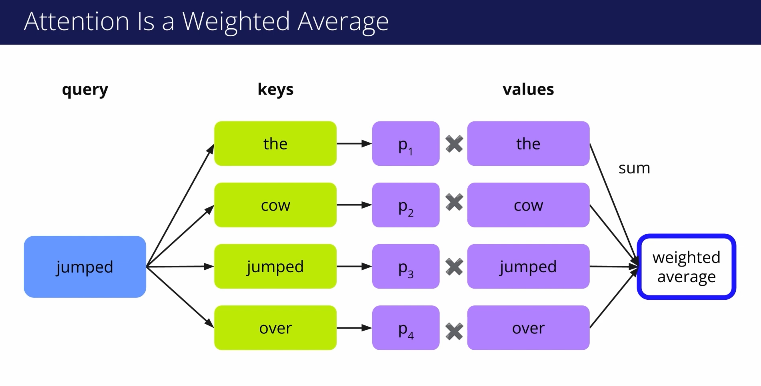
  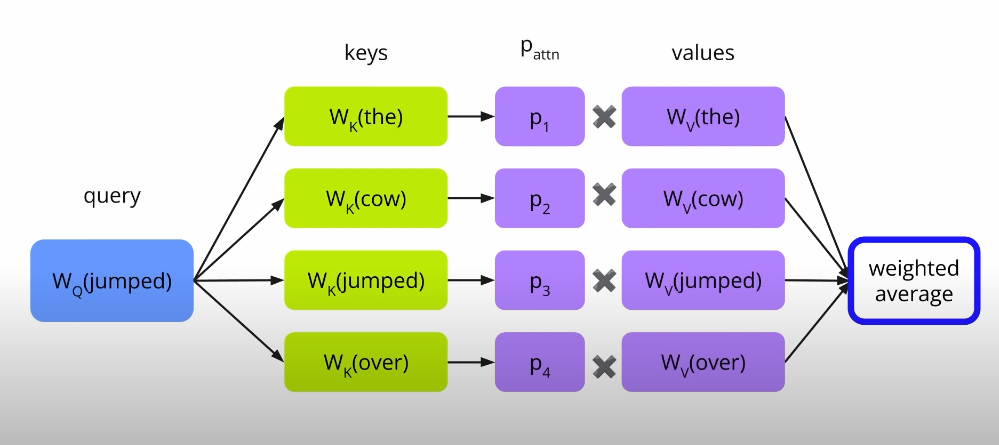
  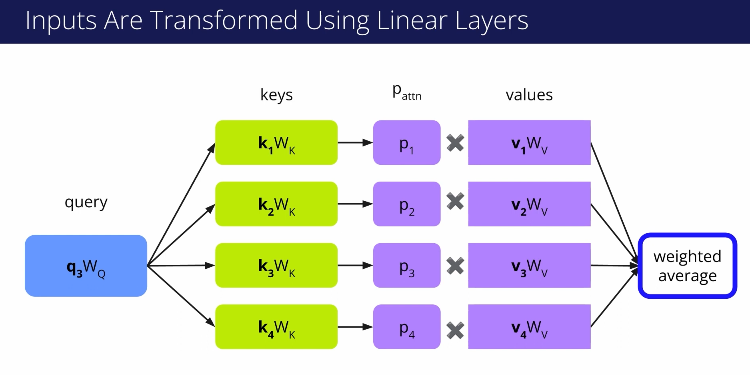
</p>

<p align="center">
  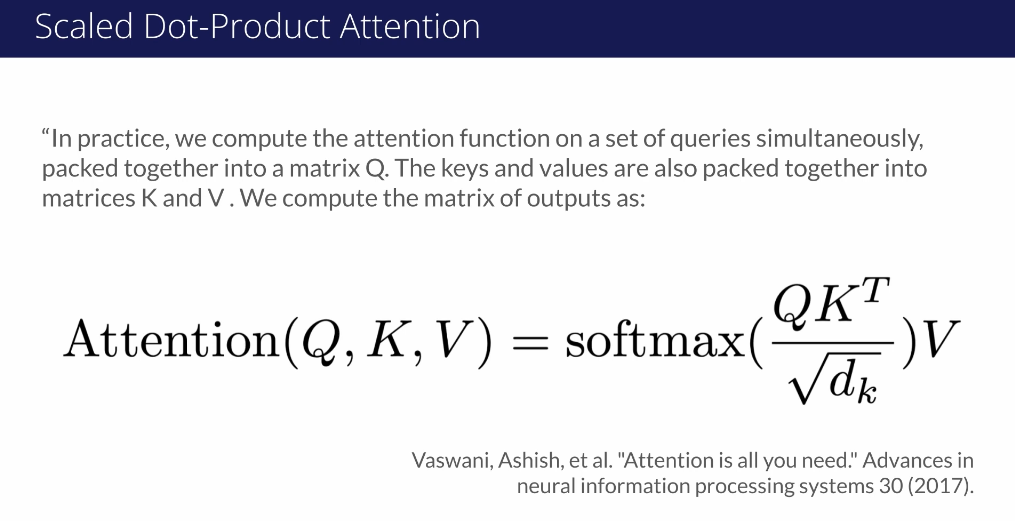
  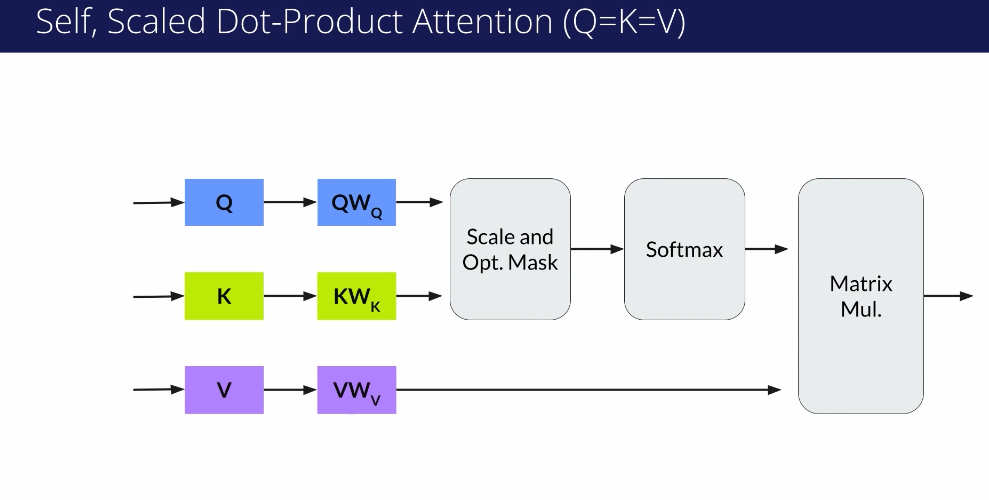
  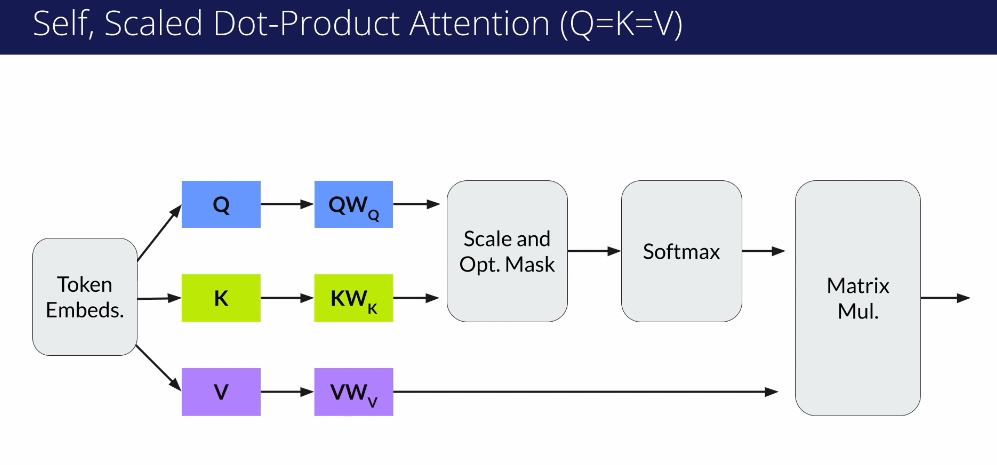
</p>


## Attention Mechanisms

__In self attension Q=K=V__

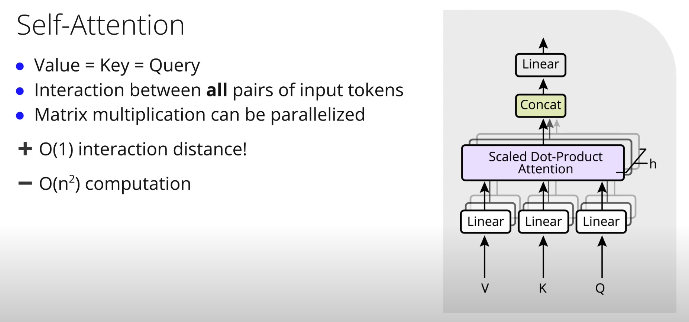
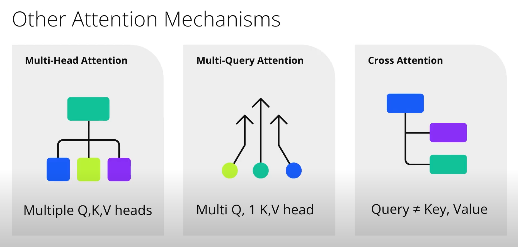 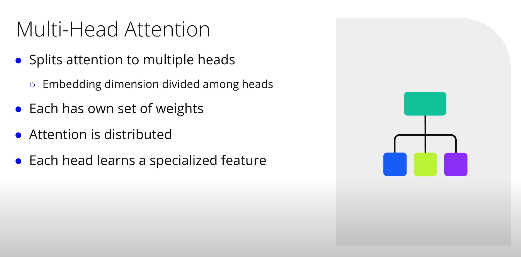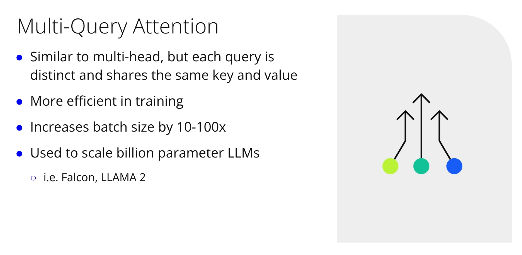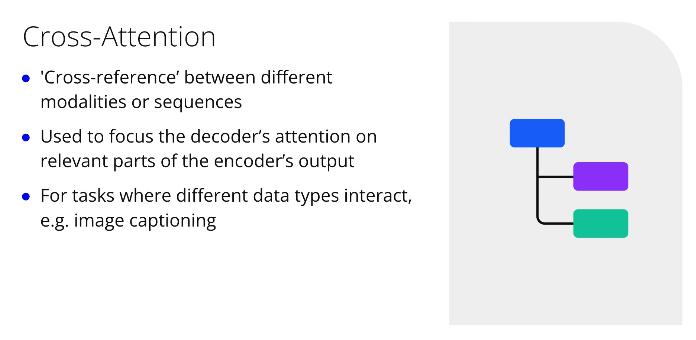

#### Can Self attension replace RNN ? Nor really because self attension also have below problems
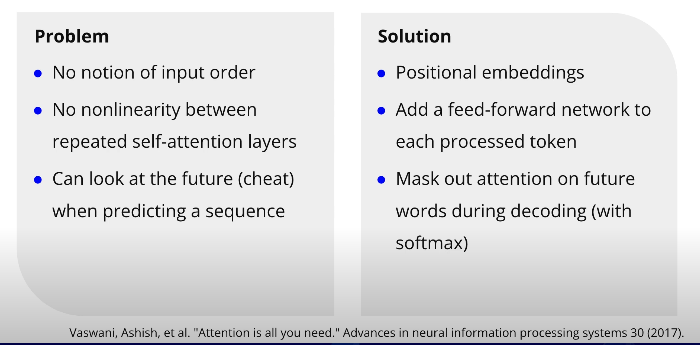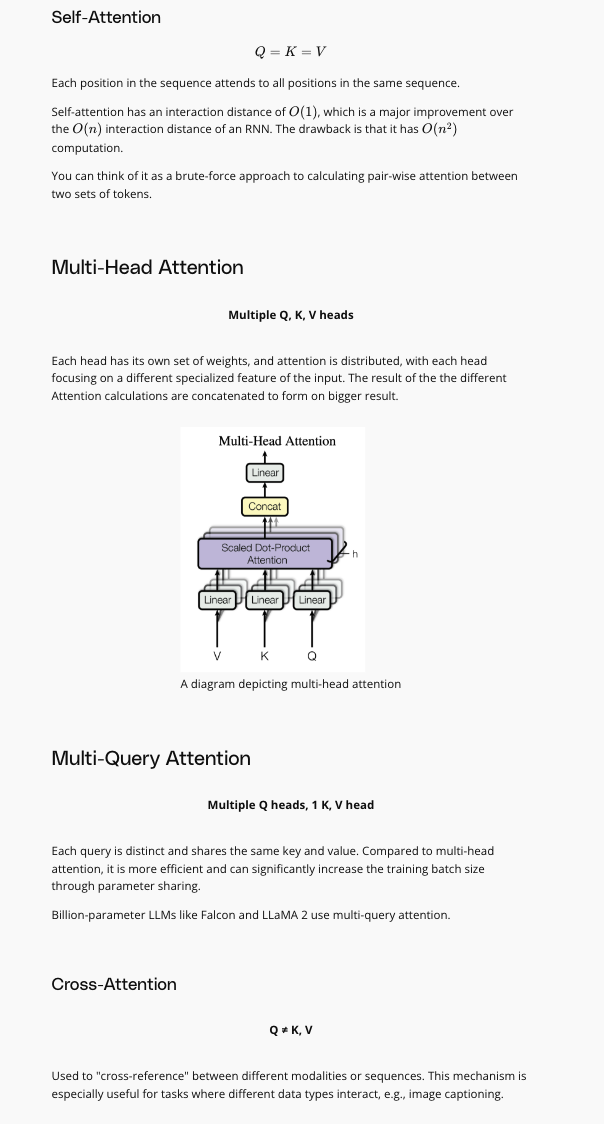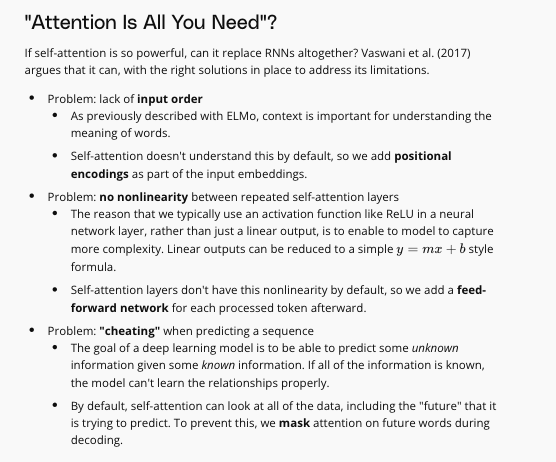

__The primary advantage of self-attention mechanisms is their ability to directly model relationships between all elements in the input sequence, regardless of their position. This allows for a more flexible and comprehensive understanding of the sequence as a whole.__

# Demo: Using BertViz To Detect Bias

Auto-regressive models trained on data created by human beings (e.g., data from the internet) will exhibit many of the same biases of those human beings. Thus, being able to visualize what's happening inside transformers is important to understanding this bias. One tool for visualizing attention is [BertViz](https://github.com/jessevig/bertviz?tab=readme-ov-file#self-attention-models-bert-gpt-2-etc).

## The doctor asked the nurse...

Two sentences are run through the auto-regressive GPT2 model:

* "The doctor asked the nurse a question. She"
* "The doctor asked the nurse a question. He"

We notice that the attention head #10 in the 5th layer shows the pronouns "She" and "He" attending to the words "nurse" and "doctor", respectively.

In [1]:
from transformers import AutoModel, AutoTokenizer, utils

utils.logging.set_verbosity_error()  # Suppress standard warnings

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModel.from_pretrained("gpt2", output_attentions=True)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [3]:
pip install bertviz

  Using cached sentencepiece-0.2.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.5 MB/s eta 0:00:00 0:00:01
Using cached sentencepiece-0.2.0-cp38-cp38-macosx_11_0_arm64.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 4.7 MB/s eta 0:00:0000:0100:01
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
ERROR: pip's dependency resolver does not currently take into account a

In [5]:
from bertviz import head_view

inputs = tokenizer.encode(
    "The doctor asked the nurse a question. She", return_tensors="pt"
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

In [6]:
inputs = tokenizer.encode(
    "The doctor asked the nurse a question. He", return_tensors="pt"
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

## The teacher asked the inspector...

A similar analysis on the following two sentences can be made:

* "The teacher asked the inspector if the school was structurally sound. He"
* "The teacher asked the inspector if the school was structurally sound. She"

In this case, the attention mechanism shows "He" attending to both teacher and inspector more or less equally but "She" attends to "teacher" disproportionately.

In [8]:
inputs = tokenizer.encode(
    "The teacher asked the inspector if the school was structurally sound. He",
    return_tensors="pt",
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

In [9]:
inputs = tokenizer.encode(
    "The teacher asked the inspector if the school was structurally sound. She",
    return_tensors="pt",
)
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

head_view(attention, tokens, layer=5, heads=[10])

<IPython.core.display.Javascript object>

Useful Links:
* [BertViz Website](https://github.com/jessevig/bertviz)
* [BertViz Paper](https://aclanthology.org/P19-3007.pdf)
* [BertViz Colab Tutorial](https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing)

#### implement the scaled multiplicative attention calculation used by the multi-head attention class used in GPT models.

# Exercise: Train your own transformer!

In this exercise you will be implementing the `forward()` function of the `MultiHeadSelfAttention` module in a minified GPT implementation. GPT refers to the "Generative Pre-trained Transformers" from OpenAI, originally described in ["Improving language understanding with unsupervised learning"](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf). This specific GPT implementation is heavily inspired by the [minGPT implementation](https://github.com/karpathy/minGPT) provided by [Andrej Karpathy](https://github.com/karpathy/).


Let's dive into the `MultiHeadSelfAttention` module, which is central to the overall GPT model.

## Scaled Multiplicative Attention

Recall this attention formula:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

This is represented in the Python code as follows:

* $Q$: `q`
* $K$: `k`
* $V$: `v`
* $\text{softmax}$: `F.softmax()`
* $K^T$: `k_t`
* $QK^T$ (matrix multiplication): `q @ k_t`
* $\sqrt{}$: `math.sqrt()`
* $d_k$: `d_k`

## Your Task: Complete the MultiHeadSelfAttention class

Within the `MultiHeadSelfAttention` class, fill in the parts marked `TODO` within the between the lines marked `EXERCISE START` and `EXERCISE END`.

Please also take the opportunity to read through the class to understand its components.

In [13]:
import math

import torch
import torch.nn as nn
from torch.nn import functional as F


class MultiHeadSelfAttention(nn.Module):
    """A vanilla multi-head masked self-attention layer."""

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0

        # key, query, value projections for all heads
        self.key = nn.Linear(config.n_embd, config.n_embd)
        self.query = nn.Linear(config.n_embd, config.n_embd)
        self.value = nn.Linear(config.n_embd, config.n_embd)

        # regularization
        self.attn_drop = nn.Dropout(config.attn_pdrop)
        self.resid_drop = nn.Dropout(config.resid_pdrop)

        # output projection
        self.proj = nn.Linear(config.n_embd, config.n_embd)

        # causal mask to ensure that attention is only applied to the left in the input sequence
        self.register_buffer(
            "mask",
            torch.tril(torch.ones(config.block_size, config.block_size)).view(
                1, 1, config.block_size, config.block_size
            ),
        )
        self.n_head = config.n_head

    def forward(self, x):
        """The forward pass for the multi-head masked self-attention layer.

        In this exercise, we include lots of print statements and checks to help you
        understand the code and the shapes of the tensors. When actually training
        such a model you would not log this information to the console.
        """

        # batch size, sequence length (in tokens), embedding dimensionality (n_embd per token)
        B, T, C = x.size()
        hs = C // self.n_head  # head size

        # print some debug information
        print(f"batch size: {B}")
        print(f"sequence length: {T}")
        print(f"embedding dimensionality: {C}")
        print(f"number of heads: {self.n_head}")
        print(f"head size: {hs}")

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        # resulting dims for k, q, and v are (B, n_head, T, hs)
        k = self.key(x).view(B, T, self.n_head, hs).transpose(1, 2)
        q = self.query(x).view(B, T, self.n_head, hs).transpose(1, 2)
        v = self.value(x).view(B, T, self.n_head, hs).transpose(1, 2)

        # === EXERCISE START: IMPLEMENT THE MULTI-HEAD ATTENTION ===

        #######################################################################
        # TODO: multiply q and k_t matrices, then divide by the square root of d_k
        print("=== Calculate MatrixMultiplication(Q, K_T) / sqrt(d_k) ===")

        k_t = k.transpose(-2, -1)  # what is the shape of k_t?
        d_k = k.size(-1)

        # Matrix multiplication (hint: not "*")
        # att = <TODO>
        att = q @ k_t / math.sqrt(d_k)  # Solution

        print(f"q.shape: {q.shape}")
        print(f"k_t.shape: {k_t.shape}")
        print(f"d_k: {d_k}")
        print(f"att.shape: {att.shape}")

        #######################################################################
        # TODO: set the mask fill value to negative infinity
        print("=== Apply the attention mask ===")

        # masked_fill_value = <TODO>
        masked_fill_value = float("-inf")  # Solution

        att = att.masked_fill(self.mask[:, :, :T, :T] == 0, masked_fill_value)

        # Show the result of applying the mask
        print(f"att: {att}")

        #######################################################################
        # TODO: apply softmax
        print("=== Softmax ===")

        # att = F.softmax(att, dim=<TODO>)
        att = F.softmax(att, dim=-1)  # Solution

        att = self.attn_drop(att)

        # Show the result of applying the softmax and check that
        # the sum of the attention weights in each row is 1
        print(f"att.shape: {att.shape}")
        print(f"att: {att}")
        print(f"att.sum(dim=-1): {att.sum(dim=-1)}")
        att_rows_sum_to_one = all(
            ((att.sum(dim=-1) - 1.0) ** 2 < 1e-6).flatten().tolist()
        )
        print(f"att_rows_sum_to_one: {att_rows_sum_to_one}")
        if not att_rows_sum_to_one:
            raise ValueError(
                "Attention weight rows do not sum to 1. Perhaps the softmax dimension or masked_fill_value is not correct?"
            )

        ######################################################################
        # TODO: multiply att and v matrices
        # (B, n_head, T, T) x (B, n_head, T, hs) -> (B, n_head, T, hs)
        print("=== Calculate final attention ===")

        # y = <TODO>
        y = att @ v  # Solution

        print(f"y.shape: {y.shape}")

        ######################################################################

        # === EXERCISE END: IMPLEMENT THE MULTI-HEAD ATTENTION ===

        # re-assemble all head outputs side by side
        y = y.transpose(1, 2).contiguous().view(B, T, C)

        # output projection
        y = self.resid_drop(self.proj(y))
        return y

**Let's check the implementation.** No modifications are needed for the next cell. Please run it as is.

In [14]:
class GPTConfig:
    vocab_size = 11
    block_size = 5
    # n_layer = 1  # not used in this exercise
    n_head = 4
    n_embd = 12

    attn_pdrop = 0.0
    resid_pdrop = 0.0


# set pytorch seed for reproducibility
attention = MultiHeadSelfAttention(GPTConfig())
x = torch.tensor(
    [
        [
            # 12-dimensional embeddings (4 heads @ 3 dim. each) for each of 5 tokens
            [1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        ]
    ]
)

# Set all parameters to 0.1
for weight in attention.parameters():
    nn.init.constant_(weight, 0.1)

# Set the model to evaluation mode to disable dropout
# attention.eval()

# Perform a forward pass
y = attention(x)

# Check that the output shape is correct
assert y.shape == x.shape


print("=== Showing the input and output ===")
print(x)
print(y)


print("=== Checking gradients ===")

loss = y.sum()
loss.backward()

# check if nan in y
if torch.isnan(y).any().item():
    raise ValueError(
        "It appears that the output contains NaNs. Perhaps the softmax dimension is incorrect?"
    )

gradients = [
    int((attention.query.weight.grad**2).sum().item()),
    int((attention.query.bias.grad**2).sum().item()),
    int((attention.key.weight.grad**2).sum().item()),
    int((attention.key.bias.grad**2).sum().item()),
    int((attention.value.weight.grad**2).sum().item()),
    int((attention.value.bias.grad**2).sum().item()),
]

print("Gradients:", gradients)
if gradients == [161, 13, 294, 0, 37187, 432]:
    print("Success! 🚀🚀🚀")
elif gradients == [1, 0, 2, 0, 38787, 432]:
    raise RuntimeError(
        "There is an error in your implementation. Please check your code. Did you remember to divide by the square root of d_k?"
    )
elif gradients[-1] == 432:
    raise RuntimeError(
        "There is an error in your implementation. Please check your code. Did you use -inf as the masked_fill_value?"
    )
else:
    raise RuntimeError(
        "There is an error in your implementation. Please check your code."
    )

batch size: 1
sequence length: 5
embedding dimensionality: 12
number of heads: 4
head size: 3
=== Calculate MatrixMultiplication(Q, K_T) / sqrt(d_k) ===
q.shape: torch.Size([1, 4, 5, 3])
k_t.shape: torch.Size([1, 4, 3, 5])
d_k: 3
att.shape: torch.Size([1, 4, 5, 5])
=== Apply the attention mask ===
att: tensor([[[[16.6450,    -inf,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,  2.9272]],

         [[16.6450,    -inf,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,    -inf,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,    -inf],
          [ 6.9802,  2.9272,  2.9272,  2.9272,  2.9272]],

         [[16.6450,    -inf,    -inf,    -inf,    -inf],
          [ 6.9802,  2.9272,    -inf,    -inf,    -inf],
        

In [20]:
def prime(n):
    if n == 1:
        return False
    else:
        for i in range(2, n):
            print(i)
            if n%i == 0:
                return False
    return True

print(prime(10))

2
False
